In [530]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

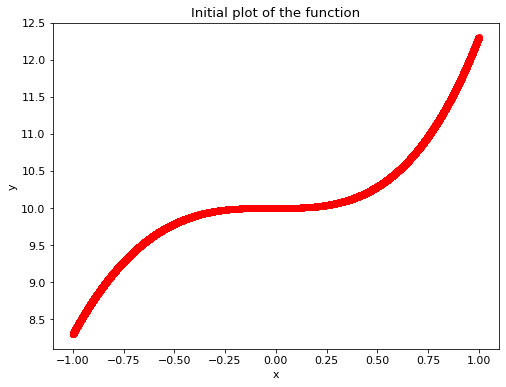

In [531]:
x = 0 ; y = 0                     # create x and y based on the question
x = np.linspace(-1, 1, 30000)
y = 0.2 * pow(x,4) + 2 * pow(x,3) + 0.1 * pow(x,2) + 10
plt.figure(figsize = (8,6)) 
plt.rc('font', size = 11) 
plt.scatter(x,y,color = 'red')     # Initial plot of the function
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial plot of the function')
plt.show()


In [532]:
def datasets(shuffle):              #  Q2 : Function to shuffle the data if needed.
  x_dataset = np.linspace(-1 , 1, 30000)
  if (shuffle == "No") :    
    y_dataset = 0.2 * pow(x_dataset, 4) + 2 * pow(x_dataset,3) + 0.1 * pow(x_dataset,2) + 10     
  elif (shuffle ==  "Yes") :      
      np.random.shuffle(x_dataset)  
      y_dataset = 0.2 * pow(x_dataset, 4) + 2 * pow(x_dataset,3) + 0.1 * pow(x_dataset,2) + 10          
  else: 
    print ("Enter Yes for shuffled data, No for unsufffled data ")
  return x_dataset, y_dataset

In [533]:
#  Q2 : Split data into train, test and validation sets
def splitdata (x_dataset, y_dataset, train_size, test_size):     #https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
  x_train, x_test, x_val  = np.split(x_dataset, [int(train_size*len(x_dataset)), int((train_size + test_size)*len(x_dataset))])
  y_train, y_test, y_val  = np.split(y_dataset, [int(train_size*len(y_dataset)), int((train_size + test_size)*len(y_dataset))])  
  return  x_train, x_test, x_val, y_train, y_test, y_val

In [534]:
# Q3 : Scale data between 0 and 1
def normalized(x_train, x_test, x_val, y_train, y_test, y_val, scale ):  
  if scale == "Yes":
    scaler = MinMaxScaler(feature_range = (0, 1))
    x_train = scaler.fit_transform(x_train.reshape(-1,1)) 
    x_test = scaler.fit_transform(x_test.reshape(-1,1))   # https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
    x_val = scaler.fit_transform(x_val.reshape(-1,1)) 
    y_train = scaler.fit_transform(y_train.reshape(-1,1))   
    y_test = scaler.fit_transform(y_test.reshape(-1,1)) 
    y_val = scaler.fit_transform(y_val.reshape(-1,1)) 
  elif scale == "No":
    x_train = x_train; x_test = x_test; x_val= x_val; y_train= y_train; y_val =y_val   
  else:
    Print("Use only Yes or No value")
  return x_train, x_test, x_val, y_train, y_test, y_val

In [535]:
def metrices(y_test,y_predicted):    # Q4:  Calculate different metrices                 #https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.metrics.mean_absolute_error
  MAE = round(mean_absolute_error(y_test, y_predicted),3)
  MSE = round(mean_squared_error(y_test, y_predicted),3)
  RMSE = round(mean_squared_error(y_test, y_predicted, squared = False),3)
  r2 = round(r2_score(y_test, y_predicted),3) 
  return MAE, MSE, RMSE, r2

In [536]:
def plots(x, y, color, title, xlabel, ylabel, structure, activation_fxn, shuffle, scale, MAE, MSE, RMSE, r2):   # plot the results with all details labels and metrices results
  if ylabel == 'y_predicted':       
    plt.figure(figsize=(8,6)) 
    plt.scatter(x, y, color = color, label = 'MAE : ' + str(MAE) + ',  MSE : ' + str (MSE)+ ',  RMSE : ' + str (RMSE)+ ',  r2 : ' + str (r2) + ', Structure = '+ str(structure))   
    plt.title(title+ ', Activation fxn = ' + str(activation_fxn) + ', Shuffle = ' + str(shuffle) + " & Scale = " + str(scale))
    plt.legend()   
  else:
    plt.figure(figsize=(8,6))    
    plt.scatter(x, y, color = color)
    plt.title(title) 
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)   
  plt.show()

In [537]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer
# https://towardsdatascience.com/building-your-first-neural-network-in-tensorflow-2-tensorflow-for-hackers-part-i-e1e2f1dfe7a0
 # https://keras.io/examples/timeseries/timeseries_weather_forecasting/
def trainmodel(structure, activation_fxn, shuffle, scale):                      # Q5 : Implement neural network structures using different hyper paramterers.
  if (structure == 1):
    model = keras.Sequential([                               
    #keras.layers.InputLayer(input_shape=(900,1)),    
    keras.layers.Dense(units=12, activation = activation_fxn),  # FCL (12 units ) // first hidden layer
    keras.layers.Dense(units=8, activation = activation_fxn),   # FCL (8 units ) // second hidden layer
    keras.layers.Dense(units=4, activation = activation_fxn),   # FCL (4 units ) // last hidden layer
    keras.layers.Dense(units=1)
     ]) 
  elif (structure == 2):
    model = keras.Sequential([   
    keras.layers.Dense(units = 24, activation = activation_fxn),
    keras.layers.Dense(units=1)  
    ])
  else: 
    print("Enter Structure type as 1 or 2 only ")
 
  model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())  # https://www.tensorflow.org/guide/keras/train_and_evaluate
 # x = np.linspace(-1, 1, 30000)
  x_dataset,y_dataset = datasets(shuffle)   
  x_train, x_test, x_val, y_train, y_test, y_val = splitdata(x_dataset,y_dataset, 0.3, 0.5) # 30 % training set, 20 % validation and 50 % test set.
  x_train, x_test, x_val, y_train, y_test, y_val = normalized(x_train, x_test, x_val, y_train, y_test, y_val, scale)
  history = model.fit(x_train, y_train, batch_size = 12, epochs = 20, validation_data = (x_val, y_val))        # https://www.tensorflow.org/api_docs/python/tf/keras/Model                                                
  y_predicted = model.predict(x_test)
  MAE, MSE, RMSE, r2 = metrices(y_test, y_predicted)  
  plots(x_test, y_test, 'green' , "x_test vs. y_test", "x_test" , "y_test", structure, activation_fxn, shuffle, scale, MAE, MSE, RMSE, r2)
  plots(x_test, y_predicted, 'blue', "x_test vs. y_predicted", "x_test", "y_predicted", structure, activation_fxn, shuffle, scale, MAE, MSE, RMSE, r2)      

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 80.1129 - val_loss: 111.3271
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 67.6965 - val_loss: 96.8250
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 56.6581 - val_loss: 83.6988
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 46.8513 - val_loss: 71.8079
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 38.1658 - val_loss: 61.0509
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 30.5260 - val_loss: 51.3617
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 23.8764 - val_loss: 42.6953
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 18.1704 - val_loss: 35.0083
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 13.3679 - val_loss: 28.2754
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 9.4286

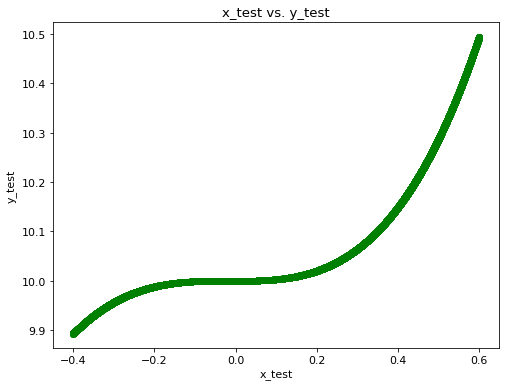

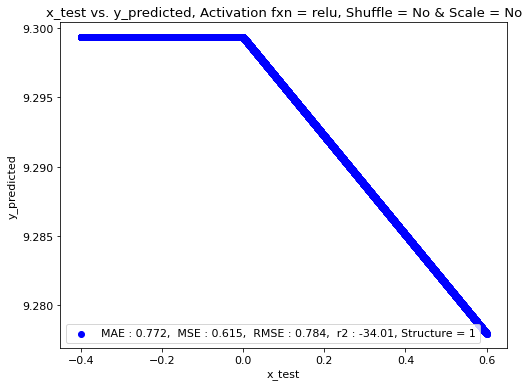

In [539]:
trainmodel(1, 'relu', "No", "No")   # trainmodel(structure = 1  or 2 , activation_fxn = "relu" or "tanh", shuffle= "Yes" or " No", scale = "Yes" or " No")